In [1]:
import pandas as pd
import random
import os
import numpy as np
from tqdm import tqdm_notebook
from collections import Counter

from gensim.models import Word2Vec
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams.update({'font.size': 15})

In [2]:
path = 'ToolsC.csv'
df = pd.read_csv(path)
df.columns
df.head()

,Tags,Score
0,ssis<sql-server-data-tools<execute-sql-task,1
1,google-chrome<google-chrome-extension<google-c...,0
2,python-3.x<or-tools,-1
3,python<python-3.x<multiprocessing<functools,0
4,google-chrome-devtools<puppeteer<chromium,1


In [3]:
tags = list(df['Tags'].unique())
all_tags = []
for tag in tqdm_notebook(tags):
    all_tags += tag.split('<')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16520\352278747.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tag in tqdm_notebook(tags):


  0%|          | 0/3595 [00:00<?, ?it/s]

In [4]:
count_tags = Counter(all_tags)
tags = pd.DataFrame([list(count_tags.keys()), list(count_tags.values())])
tags = tags.transpose()
tags.columns = ['tag', 'count']
tags = tags.sort_values(by='count', ascending=False)

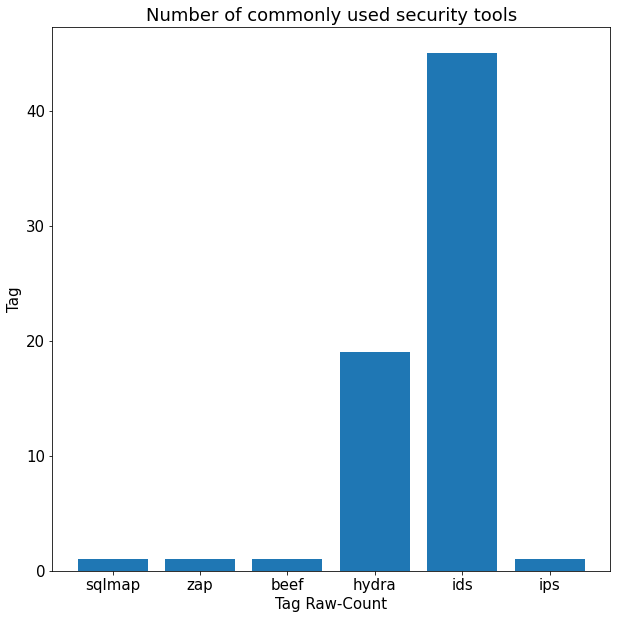

In [5]:
tools = ['sqlmap', 'zap', 'beef', 'hydra', 'ids', 'ips']
x = []
y = []
for tag in tools:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])
    
plt.bar(x, y)
plt.ylabel('Tag')
plt.xlabel('Tag Raw-Count')
plt.title('Number of commonly used security tools')
plt.show()

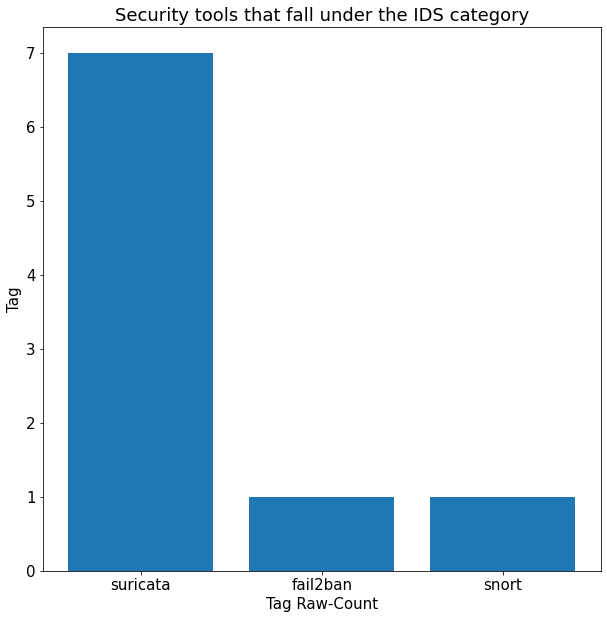

In [6]:
ids = ['suricata', 'fail2ban', 'snort']
x = []
y = []
for tag in ids:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])
    
plt.bar(x, y)
plt.ylabel('Tag')
plt.xlabel('Tag Raw-Count')
plt.title('Security tools that fall under the IDS category')
plt.show()

In [7]:
ips = ['fail2ban', 'datadog']
x = []
y = []
for tag in ips:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])
    
plt.bar(x, y)
plt.ylabel('Tag')
plt.xlabel('Tag Raw-Count')
plt.title('Security tools that fall under the IPS category')
plt.show()

ValueError: 'datadog' is not in list

In [9]:
siem = ['graylog', 'qradar', 'mcafee']
x = []
y = []
for tag in siem:
    index = list(tags['tag']).index(tag)
    x.append(tag)
    y.append(list(tags['count'])[index])
    
plt.bar(x, y)
plt.ylabel('Tag')
plt.xlabel('Tag Raw-Count')
plt.title('Security tools that fall under the SIEM category')
plt.show()

ValueError: 'qradar' is not in list